## Observations and Insights

## Dependencies and starter code

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
dataFrame=pd.merge(mouse_metadata,study_results)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
#combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
#sort data base tumor 
merge_data_sort = merge_data.sort_values(["Tumor Volume (mm3)"], ascending=True)

merge_data_sort.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


 # Summary statistics

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#tumor volume for each regimenreg
regimen_grouped=merge_data.groupby(["Drug Regimen"])
#the mean of each regimen
regimen_mean = regimen_grouped["Tumor Volume (mm3)"].mean()
#the median of each regimen
regimen_median = regimen_grouped["Tumor Volume (mm3)"].median()
#the variance of each regimen
regimen_variance = regimen_grouped["Tumor Volume (mm3)"].var()
# standart deviation of each regimen
regimen_std = regimen_grouped["Tumor Volume (mm3)"].std()
#the SEM
regimen_sem = regimen_grouped["Tumor Volume (mm3)"].sem()
# the cells in dataFrame
data_result = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, 
                            "Variance":regimen_variance, "Standard Deviation": regimen_std, "Sem": regimen_sem})
data_result


,Mean,Median,Variance,Standard Deviation,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0.5, 1.0, 'Regimen Data Point Visual')

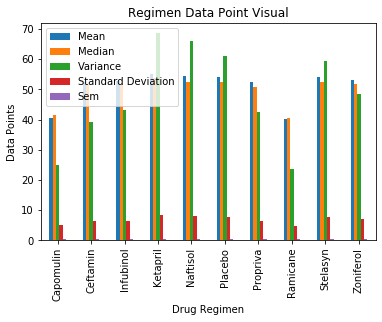

In [15]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# dataFrame a bar plot
DfBarPlots = data_result.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.title("Regimen Data Point Visual")

## Pie plots

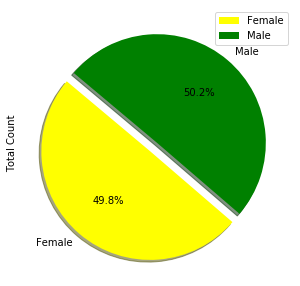

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Generate a pie plot showing the distribution of female versus male mice using pandas
#Group by "Mouse ID" and "Sex" to find the unique number of male vs female
groupby_gender = merge_data.groupby(["Mouse ID","Sex"])
groupby_gender

mouse_gender_df = pd.DataFrame(groupby_gender.size())

mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

mouse_gender

colors = ['yellow', 'green']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140,explode=explode, shadow = True,autopct="%.1f%%")

## Quartiles, outliers and boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
best_regimes = merge_data[merge_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)
best_regimes

best_regimes_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

best_regimes_data.head()

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.0
1391,Infubinol,q132,0,45.0
195,Capomulin,i738,0,45.0
205,Ramicane,a520,0,45.0
1370,Ceftamin,p438,0,45.0


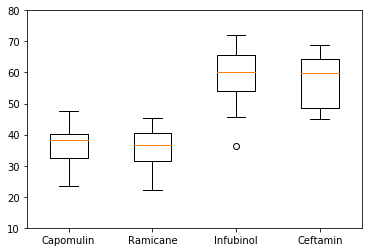

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
best_regimens_sort = best_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_regimens_sort.head()

best_regimen_df = best_regimens_sort.to_frame()
best_regimen_df

top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

final_df = best_regimen_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()

## Line and scatter plots

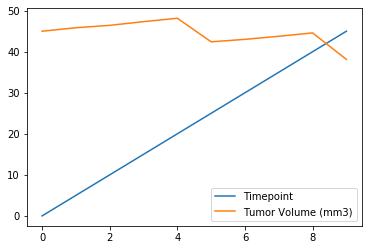

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_vs_tumer = merge_data[merge_data["Mouse ID"].isin(["j119"])]
time_vs_tumer

time_vs_tumer_data = time_vs_tumer[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumer_data

line_plot_df = time_vs_tumer_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()

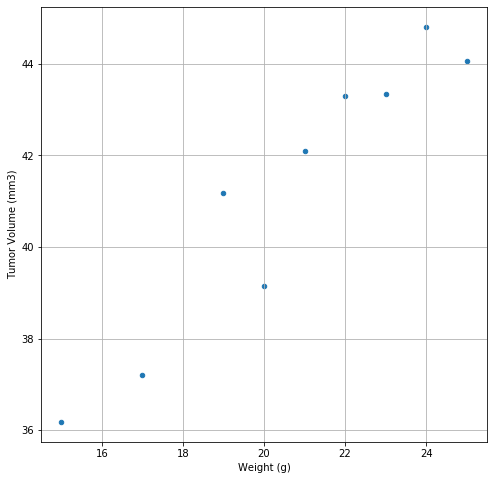

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
tumorvolume_list = line_plot_final['Tumor Volume (mm3)'].tolist()
timepoint_list = line_plot_final['Timepoint'].tolist()

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_scatter = merge_data[merge_data["Drug Regimen"].isin(["Capomulin"])]

capomulin_scatter_df = best_regimes[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

capomulin_scatter_plot =capomulin_scatter.reset_index()

capomulin_sorted = capomulin_scatter_plot.sort_values(["Weight (g)"], ascending=True)

capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()

#capomulin_scatter = capomulin_grouped_weight.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')

capomulin_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))

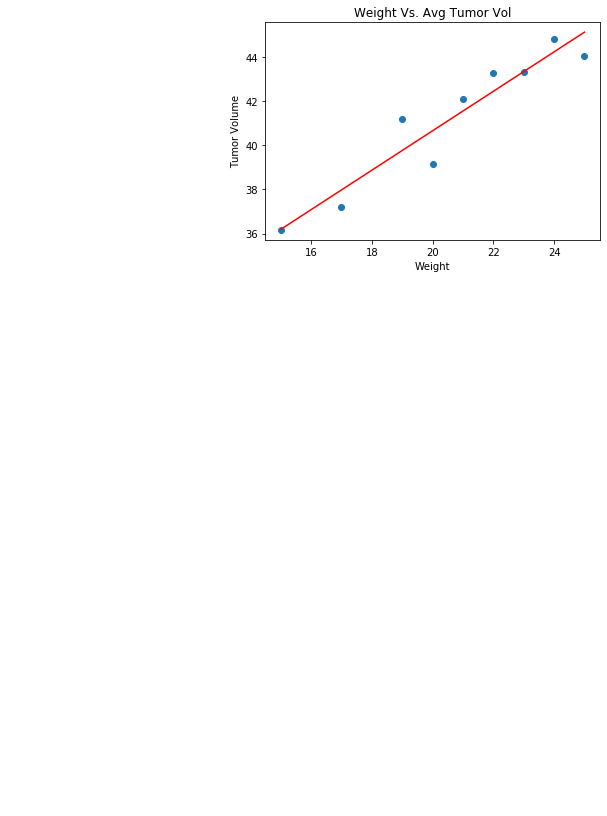

In [31]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = capo_grouped_plot["Weight (g)"]
y_values = capo_grouped_plot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()